# 1                      Predicting Insurance Claims Severity

### 2 Group members
* ### Dhanashree Dhage  ddhage@hawk.iit.edu    A20381490
* ### Ratnakar Pawar    rpawar2@hawk.iit.edu   A20375112 

### 3 Project Description


### We have anonymiezed insurance claims data given by Allscripts as part of ongoing Kaggle challange [Link - https://www.kaggle.com/c/allstate-claims-severity]. The objetive is to predict claims severity( Y- Loss value) for the chance of an insurance claim using a set of continuous and categorical variables, provided with the problem.

### Each row in the given dataset represents an insurance claim. You must predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot

### 4 Data Loading

In [2]:
### to run it fro URL
###File also at https://github.com/rpwr021/Kaggle_allstate/blob/master/train.csv

#For Local Data
#pdata = pd.read_csv("./data/train.csv")

import io
import requests
url="https://raw.githubusercontent.com/rpwr021/Kaggle_allstate/master/train.csv"
s=requests.get(url).content
pdata=pd.read_csv(io.StringIO(s.decode('utf-8')))


### Drop index column
pdata.drop('id',axis=1,inplace=True)


### Preprocessing data 

In [3]:
catFeatures = []
NumFeatures = []
labels = []


for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)

###############################
##################################
## Scaling Continuous features

pdata["loss"] = np.log(pdata["loss"])
print(NumFeatures)
scaler = MinMaxScaler()
pdata[NumFeatures] = scaler.fit_transform(pdata[NumFeatures])


        
        
for f in catFeatures:
    lb = LabelEncoder()
    lb.fit(pdata[f].unique())
    pdata[f] = lb.transform(pdata[f])

NumFeatures.remove('loss')


['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


### 5 Data Shape

In [19]:
print(pdata.shape)


(188318, 131)


### 6 Performance measures
* ###  As we are trying to predict a linear target variable, we will be using Mean absolute error as the performance measure, and choose the models that give minimum MeanAbsoluteError for predicting the final values. 
* ### We have also included negative mean squared error scores.



### 7 Baseline measures.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

r, c =pdata.shape

i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
print(catFeatures)

X = NumFeatures + catFeatures
X = pdata[X]
Y = pdata['loss']


print(Y)
print(X.shape)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [6]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


/home/raz/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 7 Baseline performance using SKlearns Dummyregressor 

In [7]:
model = DummyRegressor(strategy='mean')
result = cross_val_score(model, X, Y ,scoring='neg_mean_absolute_error' ,cv=10)

##USE more cpu

model1 = LinearRegression(n_jobs=-1)
result = np.mean(result)
result = -1*result
print(" %s" % result)

model.fit(X,Y)
Y_pred=model.predict(X)
print(mean_absolute_error(Y,Y_pred))

del model

 0.0545299912824
0.0545298792336


## Evaluating linear models 

### Simple linear regression

In [8]:
seed = 0 
cv = 10

model = LinearRegression(n_jobs=-1, normalize=1)
result = cross_val_score(model, X, Y ,scoring='neg_mean_absolute_error' ,cv=10)

model = LinearRegression(n_jobs=-1)
result = np.mean(result)
result = -1*result
print(" %s" % result)

model.fit(X,Y)
Y_pred=model.predict(X)
print(mean_absolute_error(Y,Y_pred))

del model


 0.0376802485256
0.0376507829398


### XGB performed best among selected regressors, we also observed that it performs better with incresed number of estimators 


In [9]:
model = XGBRegressor(n_estimators=70,seed=0)
result = cross_val_score(model, X, Y ,scoring='neg_mean_absolute_error' ,cv=10)

result = np.mean(result)
result = -1*result
print(" %s" % result)

model.fit(X,Y)
Y_pred=model.predict(X)
print(mean_absolute_error(Y,Y_pred))

del model

 0.037015635858
0.0369248597406


### We observed the model using Lasso performed better with lower alpha and tolerence values.

In [10]:
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.002,random_state=seed, tol=1)
result = cross_val_score(model, X, Y ,scoring='neg_mean_absolute_error' ,cv=10)
result = np.mean(result)
result = -1*result
print(" %s" % result)


model.fit(X,Y)
Y_pred=model.predict(X)
print(mean_absolute_error(Y,Y_pred))

del model

 0.0404703480264
0.0404640734379


# 7. Important feature selection

In [11]:
model = XGBRegressor(n_estimators=70,seed=0)
result = cross_val_score(model, X, Y ,scoring='neg_mean_absolute_error' ,cv=10)

result = np.mean(result)
result = -1*result
print(" %s" % result)


model.fit(X,Y)

 0.037015635858


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

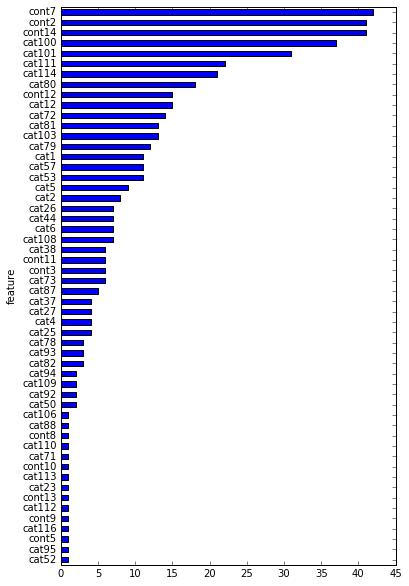

In [17]:
from matplotlib import pylab as plt
import operator 
%matplotlib inline

ftr_imp = model.booster().get_fscore()
ftr_imp = sorted(ftr_imp.items(), key=operator.itemgetter(1))
fdata = pd.DataFrame(ftr_imp, columns=['feature', 'fscore'])
fdata['fs'] = fdata['fscore'] / fdata['fscore'].sum()

plt.figure()
fdata.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))


### Conclusion


### For given data
   * ###  continuous feature carry more weight.
   * ###  Iterations tend to improve model performance to some extent.
   * ### Complex transformation could give better accuracy but also result in more computational complexity.